In [1]:
rectangle =[[1,1,7,4],[3,2,5,5],[4,3,6,9],[2,6,8,8]]
characterX = 1
characterY = 3
itemX = 7
itemY = 8

#rectangle =[[1,1,8,4],[2,2,4,9],[3,6,9,8],[6,3,7,7]]
#characterX = 9
#characterY = 7
#itemX = 6
#itemY = 1

In [2]:
def drawLine(arr):
    rtn = []
    x1, y1 = arr[0], arr[1]
    x2, y2 = arr[2], arr[3]

    for i in range(y1, y2+1):
        rtn.append([x1, i])
        rtn.append([x2, i])
        if(i<y2):
            rtn.append([x1, i+0.5])
            rtn.append([x2, i+0.5])
    
    for i in range(x1, x2+1):
        rtn.append([i, y1])
        rtn.append([i, y2])
        if(i<x2):
            rtn.append([i+0.5, y1])
            rtn.append([i+0.5, y2])
        
    return(rtn)

def dropLine(rect, line):
    drops = []
    rx1, ry1 = rect[0], rect[1]
    rx2, ry2 = rect[2], rect[3]
    
    for l in line:
        lx, ly = l[0], l[1]

        if(rx1 < lx and rx2 > lx) and (ry1 < ly and ry2 > ly):
            drops.append(l)
                
    return drops

def move(x, y, moved):
    if [x+0.5, y] in rst:
        rst.remove([x+0.5,y])
        x += 1
        moved += 1
    elif [x, y+0.5] in rst:
        rst.remove([x,y+0.5])
        y += 1
        moved += 1
    elif [x-0.5, y] in rst:
        rst.remove([x-0.5,y])
        x -= 1
        moved += 1
    elif [x, y-0.5] in rst:
        rst.remove([x,y-0.5])
        y -= 1
        moved += 1
        
    return(x, y,moved)
    
def action(x, y, mov):
    #print("start:",x, y, "to item:", itemX, itemY)
    while (itemX != x or itemY != y):
        x, y, mov = move(x, y, mov)

    return mov

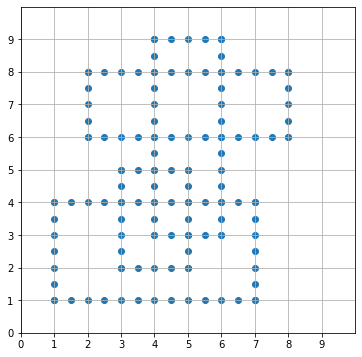

In [3]:
import numpy as np
from matplotlib import pyplot as plt

def showLine(line):
    test = np.array(line)
    x, y = test.T
    
    plt.figure(figsize=(6,6))
    plt.xlim(0,10)
    plt.ylim(0,10)
    plt.xticks(range(0,10))
    plt.yticks(range(0,10))
    plt.grid(True)
    #plt.axis('equal')

    plt.scatter(x,y)    
    plt.show()


#0.5단위 점생성
line = []
for r in rectangle:
    line.extend( drawLine(r) )

showLine(line)

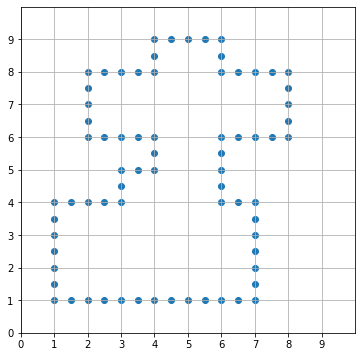

In [4]:
#겹치는 부분 추출
drops = []
for a in rectangle:
    for b in rectangle:
        drops.extend( dropLine(a, drawLine(b)) )

#겹치는 부분 삭제
for d in drops:
    if d in line:
        line.remove(d)
    
#중복제거
rst = []
for l in line:
    if l not in rst:
        rst.append(l)

showLine(rst)

In [5]:
a = action(characterX, characterY, 0)
b = action(characterX, characterY, 0)

print(min(a,b))

17
